In [1]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_csv("Data/notes_étudiants.csv", sep=',', index_col='id' )
n = data.shape[0]
p = data.shape[1]


# Application de l'ACP

In [2]:
s_scaler = StandardScaler()
scaled_data = s_scaler.fit_transform(data)


In [3]:
print(np.mean(scaled_data,axis=0))

[ 1.31208176e-16  4.37360585e-17 -1.07657990e-16  9.08364293e-17
 -1.95130107e-16 -1.48029737e-16 -9.42007415e-17  1.61486985e-16
 -1.68215610e-16  8.99953512e-17]


In [4]:
print(np.std(scaled_data,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
pca = PCA()
coords = pca.fit_transform(scaled_data)

In [5]:
print(pca.explained_variance_ratio_)

[0.39895152 0.29268582 0.16848099 0.0951434  0.01518182 0.00992171
 0.00778928 0.00633025 0.0030013  0.00251392]


In [7]:
print(pca.explained_variance_)

[4.11418751 3.01832247 1.73746023 0.98116629 0.15656251 0.10231765
 0.08032697 0.06528068 0.03095086 0.02592482]


In [6]:
eigenvalues = (n-1)/n*pca.explained_variance_
print(eigenvalues)

[3.98951516 2.92685816 1.68480992 0.95143398 0.15181819 0.09921712
 0.07789282 0.06330248 0.03001295 0.02513922]


# Interprétation des résultats sur les individus

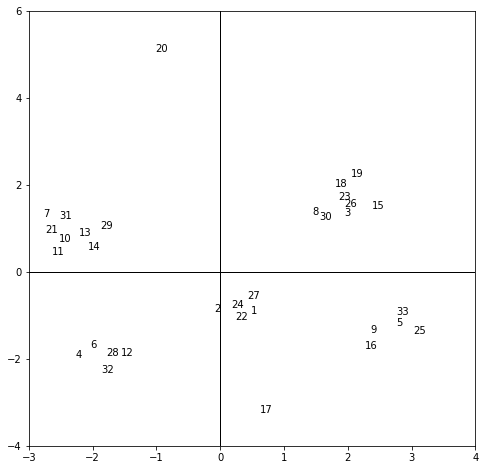

In [12]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-3,4)
axes.set_ylim(-4,6)
plt.plot([-3,4],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-4,6],color='black',linewidth=1)

for i in range(n):
    plt.annotate(data.index[i],(coords[i,0],coords[i,1]))